In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [ ]:
def encode_string_data(array):
  le = preprocessing.LabelEncoder()
  le.fit(array)
  le.classes_
  return(le.transform(array))

In [ ]:
def SVM(X_train, X_test, Y_train, Y_test):
  #fit training data to SVC
  clf = SVC() 
  clf.fit(X_train,Y_train)

  #Predicting the classes for test set
  Y_pred = clf.predict(X_test)

  #Comparing the actual classes and predictions
  cm = confusion_matrix(Y_test,Y_pred)
  accuracy = float(cm.diagonal().sum())/len(Y_test)
  return(accuracy)

In [ ]:
def scale(data):
  # define standard scaler
  scaler = StandardScaler()
  # transform data
  scaled = scaler.fit_transform(data)
  return(scaled)
  
  #using standardization scaler because: 
  #   - data follows a natural distrubution
  #   - not sensitive to outliers

  #only the input (i.e the x-values/features) should be scaled

In [ ]:
def use_PCA(data):
  pca = PCA()
  data = pca.fit_transform(data)
  return(data)

In [ ]:
def elbow_method(Input_value):
  #Can be used to find the best possible k-value
  # to store WCSS
  wcss = []

  # for loop 
  for i in range(1, 11):
      
      # k-mean cluster model for different k values
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
      kmeans.fit(Input_value)
      
      # inertia method returns wcss for that model
      wcss.append(kmeans.inertia_)

  # figure size
  plt.figure(figsize=(10,5))
  sns.lineplot(range(1, 11), wcss,marker='o',color='green')

  # labeling
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()

In [ ]:
def agglomerative_clustering(X_principal, X, Y):
  plt.figure(figsize =(8, 8))
  plt.title('Visualising the data')
  Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

  ac2 = AgglomerativeClustering(n_clusters = 2)

  # Visualizing the clustering
  plt.figure(figsize =(6, 6))
  plt.scatter(X_principal[:, X], X_principal[:, Y],
            c = ac2.fit_predict(X_principal), cmap ='rainbow')
  plt.show()

  ac3 = AgglomerativeClustering(n_clusters = 3)
  plt.figure(figsize =(6, 6))
  plt.scatter(X_principal[:, X], X_principal[:, Y],
            c = ac3.fit_predict(X_principal), cmap ='rainbow')
  plt.show()

  ac4 = AgglomerativeClustering(n_clusters = 4)
  plt.figure(figsize =(6, 6))
  plt.scatter(X_principal[:, X], X_principal[:, Y],
              c = ac4.fit_predict(X_principal), cmap ='rainbow')
  plt.show()

  ac5 = AgglomerativeClustering(n_clusters = 5)
  plt.figure(figsize =(6, 6))
  plt.scatter(X_principal[:, X], X_principal[:, Y],
              c = ac5.fit_predict(X_principal), cmap ='rainbow')
  plt.show()

  ac6 = AgglomerativeClustering(n_clusters = 6)
  plt.figure(figsize =(6, 6))
  plt.scatter(X_principal[:, X], X_principal[:, Y],
              c = ac6.fit_predict(X_principal), cmap ='rainbow')
  plt.show()

  k = [2, 3, 4, 5, 6]
 
  # Appending the silhouette scores of the different models to the list
  silhouette_scores = []
  silhouette_scores.append(
          silhouette_score(X_principal, ac2.fit_predict(X_principal)))
  silhouette_scores.append(
          silhouette_score(X_principal, ac3.fit_predict(X_principal)))
  silhouette_scores.append(
          silhouette_score(X_principal, ac4.fit_predict(X_principal)))
  silhouette_scores.append(
          silhouette_score(X_principal, ac5.fit_predict(X_principal)))
  silhouette_scores.append(
          silhouette_score(X_principal, ac6.fit_predict(X_principal)))
  
  # Plotting a bar graph to compare the results
  plt.bar(k, silhouette_scores)
  plt.xlabel('Number of clusters', fontsize = 20)
  plt.ylabel('S(i)', fontsize = 20)
  plt.show()

  

In [ ]:
def DBscan(X_principal, X, Y):
  db = DBSCAN().fit(X_principal)
  labels = db.labels_

  #visualize
  colours1 = {}
  colours1[0] = 'r'
  colours1[1] = 'g'
  colours1[2] = 'b'
  colours1[3] = 'c'
  colours1[4] = 'y'
  colours1[5] = 'm'
  colours1[-1] = 'k'
    
  cvec = [colours1[label] for label in labels]
  colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]
    
  r = plt.scatter(
          X_principal[:, X], X_principal[:, Y], marker ='o', color = colors[0])
  g = plt.scatter(
          X_principal[:, X], X_principal[:, Y], marker ='o', color = colors[1])
  b = plt.scatter(
          X_principal[:, X], X_principal[:, Y], marker ='o', color = colors[2])
  c = plt.scatter(
          X_principal[:, X], X_principal[:, Y], marker ='o', color = colors[3])
  y = plt.scatter(
          X_principal[:, X], X_principal[:, Y], marker ='o', color = colors[4])
  m = plt.scatter(
          X_principal[:, X], X_principal[:, Y], marker ='o', color = colors[5])
  k = plt.scatter(
          X_principal[:, X], X_principal[:, Y], marker ='o', color = colors[6])
    
  plt.figure(figsize =(9, 9))
  plt.scatter(X_principal[:, X], X_principal[:, Y], c = cvec)
  plt.legend((r, g, b, c, y, m, k),
            ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4',
              'Label 5', 'Label -1'),
            scatterpoints = 1,
            loc ='upper left',
            ncol = 3,
            fontsize = 8)
  plt.show()

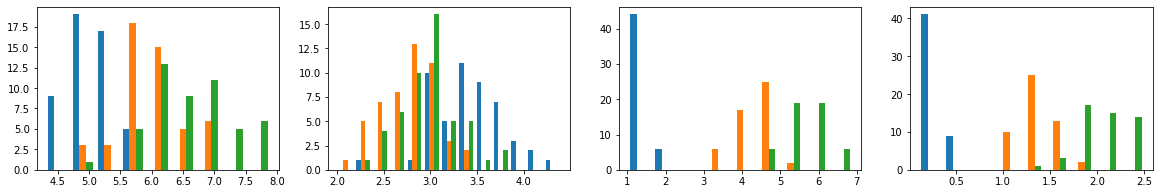

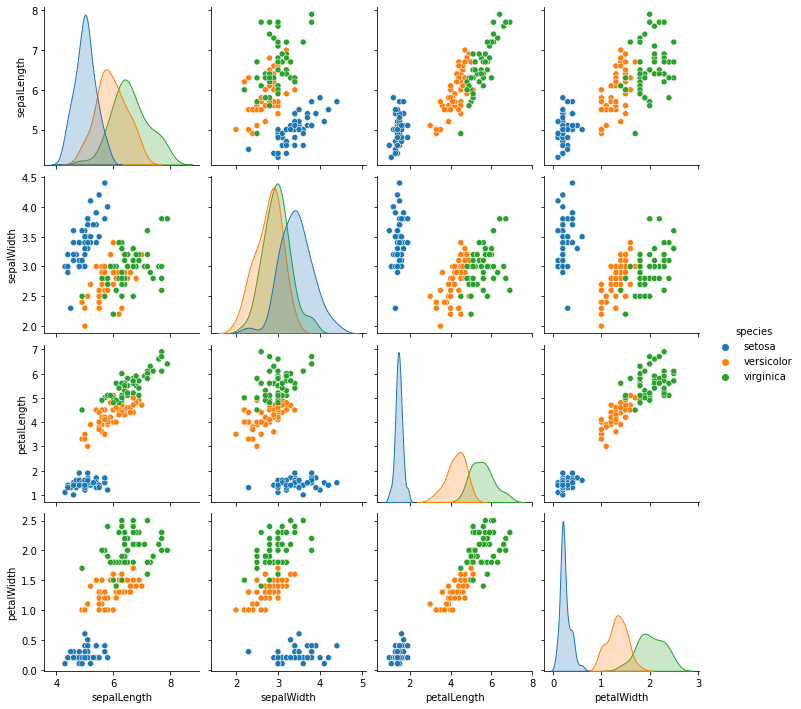

In [48]:
#Plot df_iris data

#reload data
df_iris = pd.read_json('/content/drive/MyDrive/Minna Leijonhufvud/Assignment 4/Kopia av iris.json')

#identify index-spans for each species
inspan_setosa = df_iris[df_iris['species']=='setosa'].index.values.tolist()
inspan_versicolor = df_iris[df_iris['species']=='versicolor'].index.values.tolist()
inspan_virginica = df_iris[df_iris['species']=='virginica'].index.values.tolist()

#extract datavalues based on these indecies

#for sepal length:
sepalLength_setosa = df_iris['sepalLength'][inspan_setosa]
sepalLength_versicolor = df_iris['sepalLength'][inspan_versicolor]
sepalLength_virginica = df_iris['sepalLength'][inspan_virginica]

#for sepal width:
sepalWidth_setosa = df_iris['sepalWidth'][inspan_setosa]
sepalWidth_versicolor = df_iris['sepalWidth'][inspan_versicolor]
sepalWidth_virginica = df_iris['sepalWidth'][inspan_virginica]

#for petal length:
petalLength_setosa = df_iris['petalLength'][inspan_setosa]
petalLength_versicolor = df_iris['petalLength'][inspan_versicolor]
petalLength_virginica = df_iris['petalLength'][inspan_virginica]

#for petal width:
petalWidth_setosa = df_iris['petalWidth'][inspan_setosa]
petalWidth_versicolor = df_iris['petalWidth'][inspan_versicolor]
petalWidth_virginica = df_iris['petalWidth'][inspan_virginica]

#create figure for plotting with 4 subplots
fig = plt.figure(figsize=(20,3))

ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

#plot values in each data category on each subplot
ax1.hist([sepalLength_setosa, sepalLength_versicolor, sepalLength_virginica ], bins= 'auto')
ax2.hist([sepalWidth_setosa, sepalWidth_versicolor, sepalWidth_virginica ], bins= 'auto')
ax3.hist([petalLength_setosa, petalLength_versicolor, petalLength_virginica ], bins= 'auto')
ax4.hist([petalWidth_setosa, petalWidth_versicolor, petalWidth_virginica ], bins= 'auto')

#My prefered way of showcasing this type of data:
sns.pairplot(df_iris, hue="species")

accuracy of SVM for given dataset:  0.9666666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


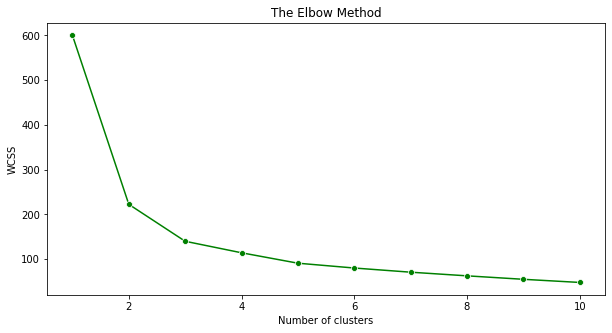

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


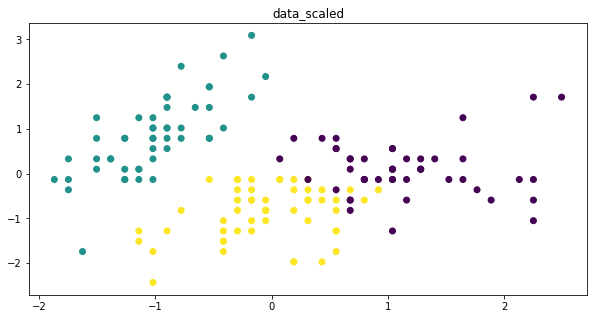

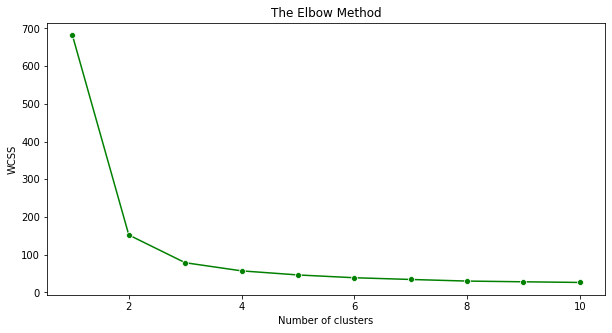

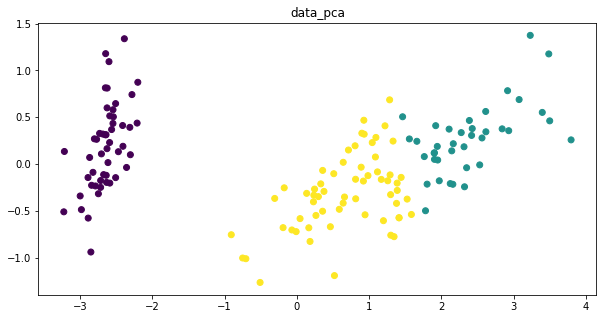

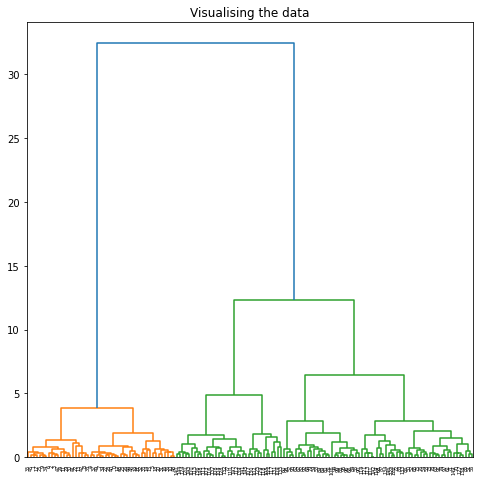

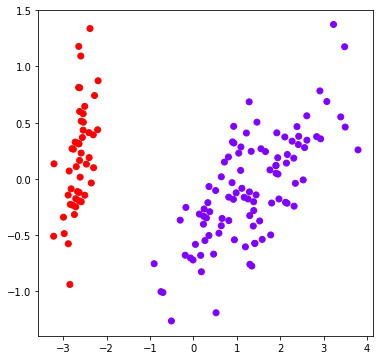

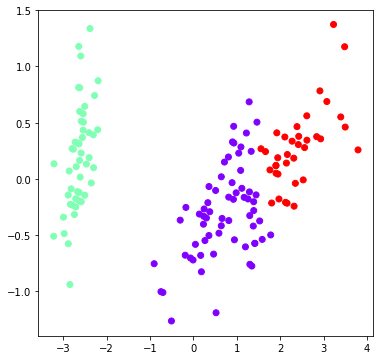

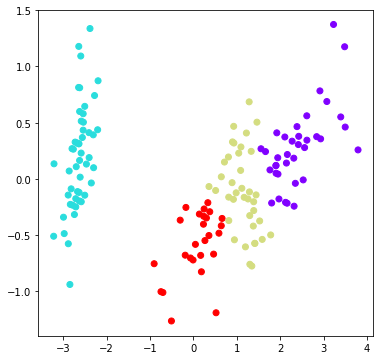

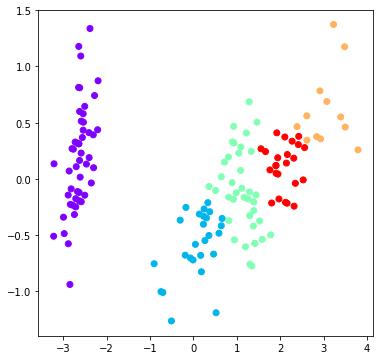

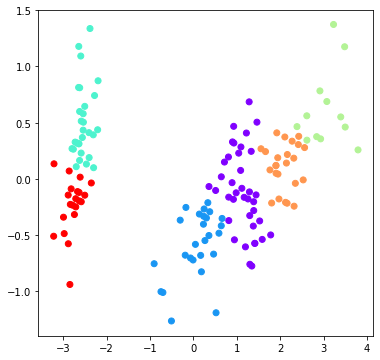

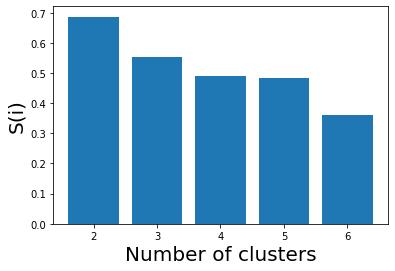

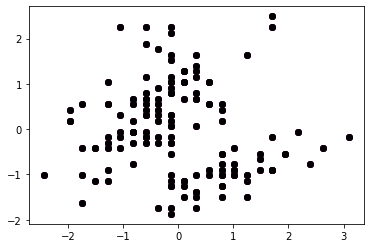

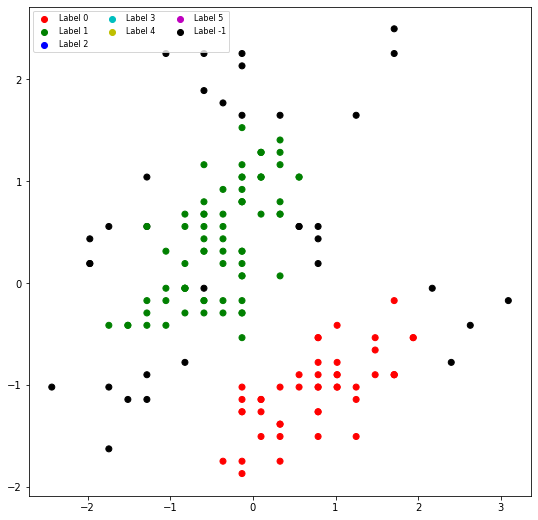

In [ ]:
#Load iris.json
df_iris = pd.read_json('/content/drive/MyDrive/Minna Leijonhufvud/Assignment 4/Kopia av iris.json')

#Encode target values
species = encode_string_data(df_iris['species'])
#define
data = df_iris.drop(['species'], axis = 1) 

#split into train and test values
Y_train, Y_test = train_test_split(species, test_size = 0.2, random_state = 1)
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 1)

#print accyracy: goal is for it to be as high as possible
print('accuracy of SVM for given dataset: ', SVM(X_train, X_test, Y_train, Y_test))
                                                                                     #har jag scalat och använt PCA på rätt värden?
#scale features
data_scaled = scale(data)

#use PCA
data_pca = use_PCA(data)

#Applying K-means algorithmn on scaled data
#use elbow method and plot results
plot = elbow_method(data_scaled) 
plot

# k value assigned to 3 fo each species of flower
kmeans = KMeans(n_clusters=3, random_state=0) 

# cluster size is set to be 3
km = KMeans(n_clusters = 3)
km.fit(data_scaled)

# ploting the graph of the clusters
plt.figure(figsize=(10,5))
plt.scatter(x= data_scaled[:, 0], y=data_scaled[:, 1], c= km.labels_)
plt.title('data_scaled')

#Applying K-means algorithmn on pca data
#use elbow method and plot results
plot = elbow_method(data_pca) 
plot

# k value assigned to 3 fo each species of flower
kmeans = KMeans(n_clusters=3, random_state=0) 

# cluster size is set to be 3
km = KMeans(n_clusters = 3)
km.fit(data_pca)

# ploting the graph of the clusters
plt.figure(figsize=(10,5))
plt.scatter(x= data_pca[:, 0], y=data_pca[:, 1], c= km.labels_)
plt.title('data_pca')

#use agglomerative clustering
agglomerative_clustering(data_pca, 0, 1)
#use DBscan
DBscan(data_scaled, 1, 0)
                                                                #färgläggningen på denna funkar som tomatsoppa i en bensintank

Vilken av PCA och scaled som fungerar bäst verkar bero på vilka kolumner i datasettet man använder


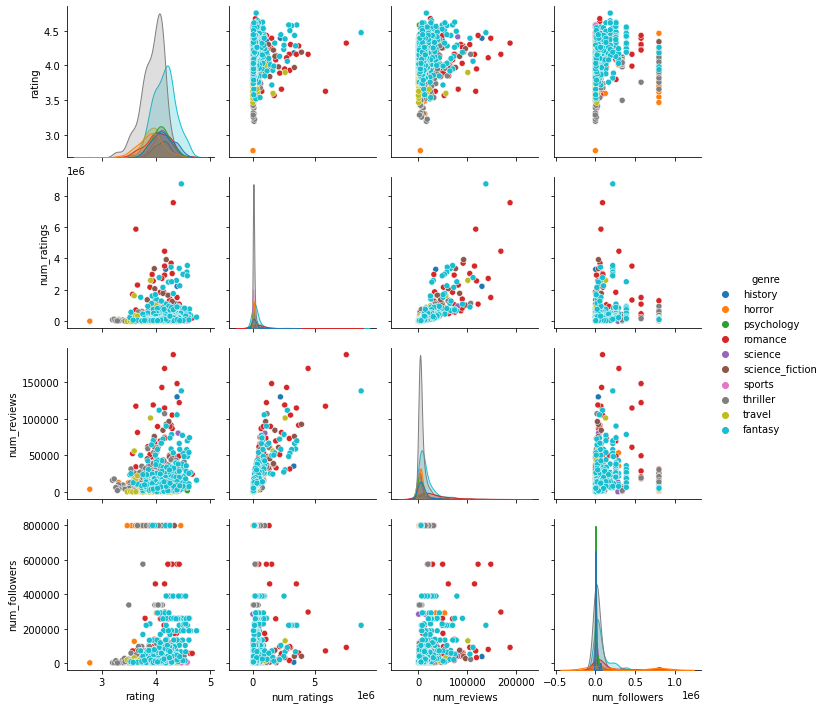

In [57]:
#Plot df_books in histogram
df_books = pd.read_json('/content/drive/MyDrive/Minna Leijonhufvud/Assignment 4/Kopia av books.json')
df_books = df_books.drop(['Column1'], axis = 1) 

sns.pairplot(df_books, hue = 'genre')

Redan här uppe ser vi ju att den inte finns en korrelation mellan rating och num_followers

accuracy of SVM for given dataset:  0.4253246753246753


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


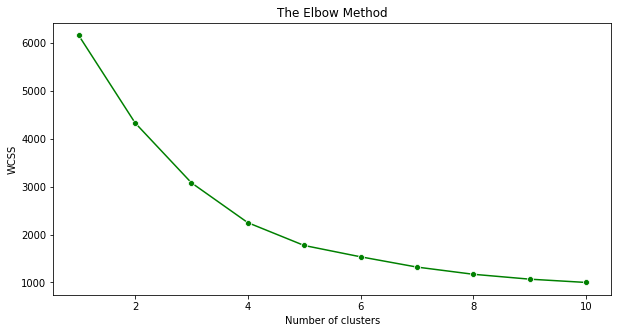

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


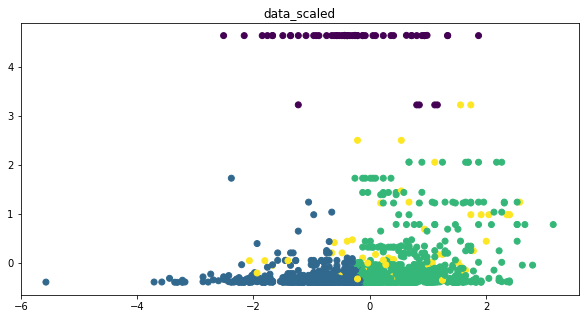

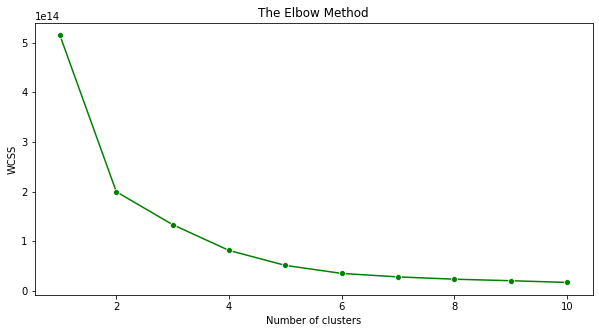

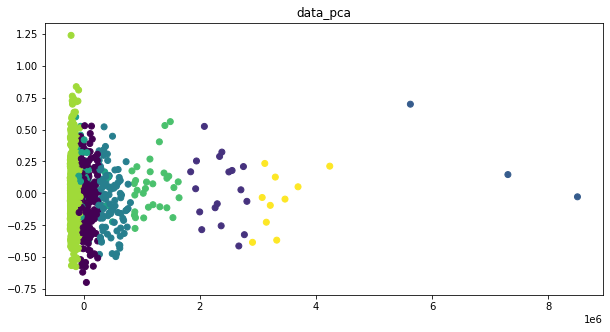

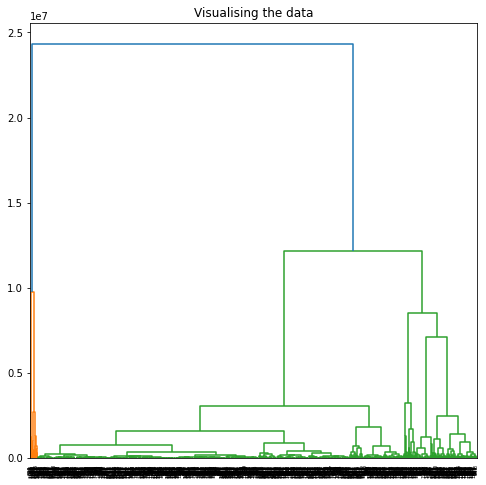

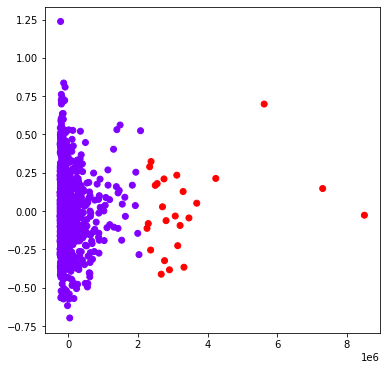

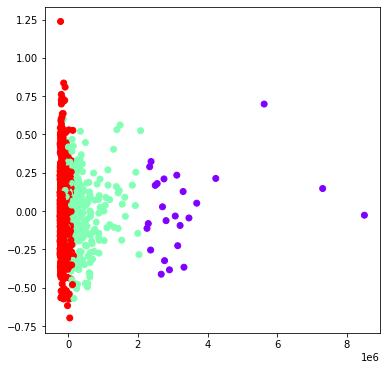

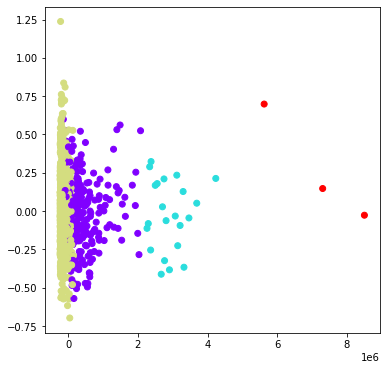

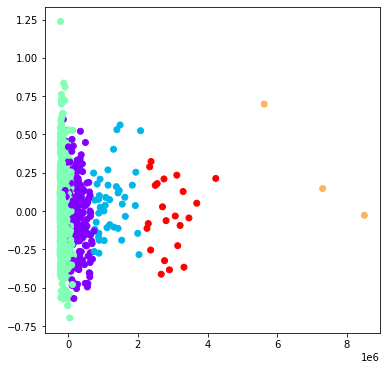

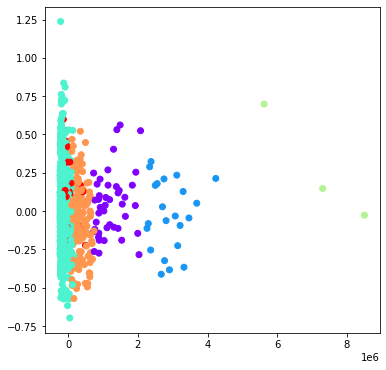

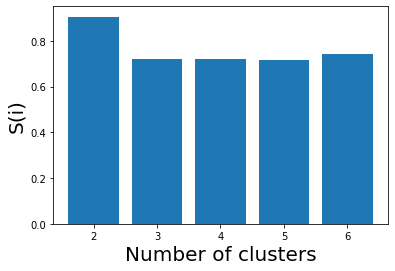

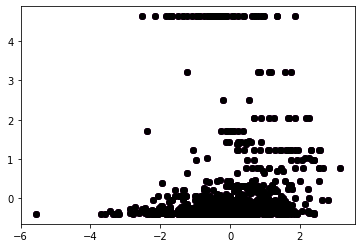

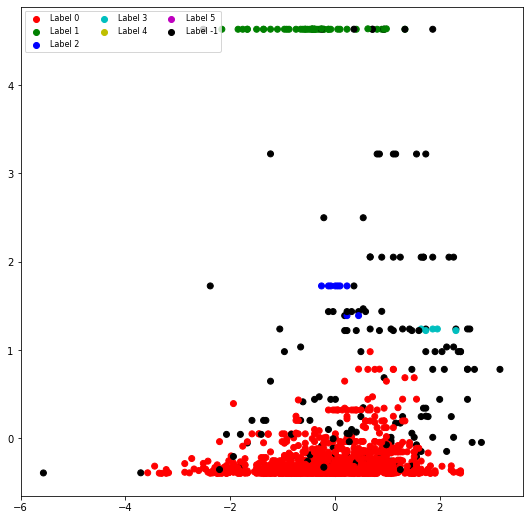

In [ ]:
#Load in books.json
df_books = pd.read_json('/content/drive/MyDrive/Minna Leijonhufvud/Assignment 4/Kopia av books.json')

#encode target values
genre = encode_string_data(np.array(df_books.iloc[:,8])).reshape(-1, 1)
#define
data = df_books.drop(['title', 'name', 'synopsis', 'Column1', 'genre'], axis = 1) 

#split into train and test values
Y_train, Y_test = train_test_split(genre, test_size = 0.2, random_state = 1)
Y_train = np.ravel(Y_train)
Y_test = np.ravel(Y_test)
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 1)

#print accyracy: goal is for it to be as high as possible
print('accuracy of SVM for given dataset: ', SVM(X_train, X_test, Y_train, Y_test))

#scale features
data_scaled = scale(data)

#use PCA
data_pca = use_PCA(data)
                                                                                  #Jag har väldigt svårt att förstå mig på varför clusterings skulle vara anvämdbart på books datan
#Applying K-means algorithmn on scaled data
#use elbow method and plot results
plot = elbow_method(data_scaled) 
plot

# k value assigned to 3 fo each species of flower
kmeans = KMeans(n_clusters=3) 

# cluster size is set to be 3
km = KMeans(n_clusters = 4)
km.fit(data_scaled)

# ploting the graph of the clusters
plt.figure(figsize=(10,5))
plt.scatter(x= data_scaled[:, 0], y=data_scaled[:, 3], c= km.labels_)
plt.title('data_scaled')

#Applying K-means algorithmn on pca data
#use elbow method and plot results
plot = elbow_method(data_pca) 
plot

# k value assigned to 3 fo each species of flower
kmeans = KMeans(n_clusters=3, random_state=0) 

# cluster size is set to be 3
km = KMeans(n_clusters = 3)
km.fit(data_pca)

# ploting the graph of the clusters
plt.figure(figsize=(10,5))
plt.scatter(x= data_pca[:, 0], y=data_pca[:, 3], c= km.labels_)
plt.title('data_pca')

#use agglomerative clustering
agglomerative_clustering(data_pca, 0, 3)
#use DBscan
DBscan(data_scaled, 0, 3)

Clustering på books ser bajs ut. Uppdelningen är ju inte på genre helt klart. Jag förstår inte riktigt vad poängen med att använda en clustering algorithm på books filen var. 

Fler frågor:
Hur får man tillgången till datan som clustras och hur är denna formaterad?
Har man det kan det ju inte vara så svårt att föra in fler features i den datan och på så vis få bättre 'clusters'? Det borde väll säga mer än att bara använda en feature?

HUr färglägger jag books datan baserat på genre? Jag bortsåg ju från hela det problemet på iris i stort sett, men jag orkar in